## **Logistic Regression**


**Import necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
#Set random seed for reproducability
np.random.seed(42)

**Exploring Iris Dataset**

In [5]:
#Load the iris dataset from scikit-learn
iris = load_iris()

In [12]:
# The feature names are stored in iris.feature_names

df = pd.DataFrame(data= iris.data, columns = iris.feature_names)

#Add the target names (species) as storied in iris.target_names
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

#Lets also keep the numerical target for modeling
df['target'] = iris.target

#Display the first few rows of the datatset
print("First 5 rows of Iris dataset:")
print(df.head())

First 5 rows of Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm) species  target
0                5.1               3.5                1.4               0.2  setosa       0
1                4.9               3.0                1.4               0.2  setosa       0
2                4.7               3.2                1.3               0.2  setosa       0
3                4.6               3.1                1.5               0.2  setosa       0
4                5.0               3.6                1.4               0.2  setosa       0


In [13]:
#Get the basic information about the dataset
print("\nDataset information:")
print(f"\n Number of samples: {df.shape[0]}")
print(f"\n Number of features: {len(iris.feature_names)}")
print(f"\n Feature names: {iris.feature_names}")
print(f"\n Target names (species): {iris.target_names}")


Dataset information:

 Number of samples: 150

 Number of features: 4

 Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 Target names (species): ['setosa' 'versicolor' 'virginica']


In [10]:
#Check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

#Summary statistics
print("\n Summary statistic:")
print(df.describe())

#Class distribution
print("\n Class distribution:")
print(df['species'].value_counts())

Missing values in the dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
target               0
dtype: int64

 Summary statistic:
       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)      target
count         150.000000        150.000000         150.000000        150.000000  150.000000
mean            5.843333          3.057333           3.758000          1.199333    1.000000
std             0.828066          0.435866           1.765298          0.762238    0.819232
min             4.300000          2.000000           1.000000          0.100000    0.000000
25%             5.100000          2.800000           1.600000          0.300000    0.000000
50%             5.800000          3.000000           4.350000          1.300000    1.000000
75%             6.400000          3.300000           5.100000          1.800000    2.000000
max             7.900000          4.400000           6.900000

**Exploratory Data Analysis with Matplotlib**

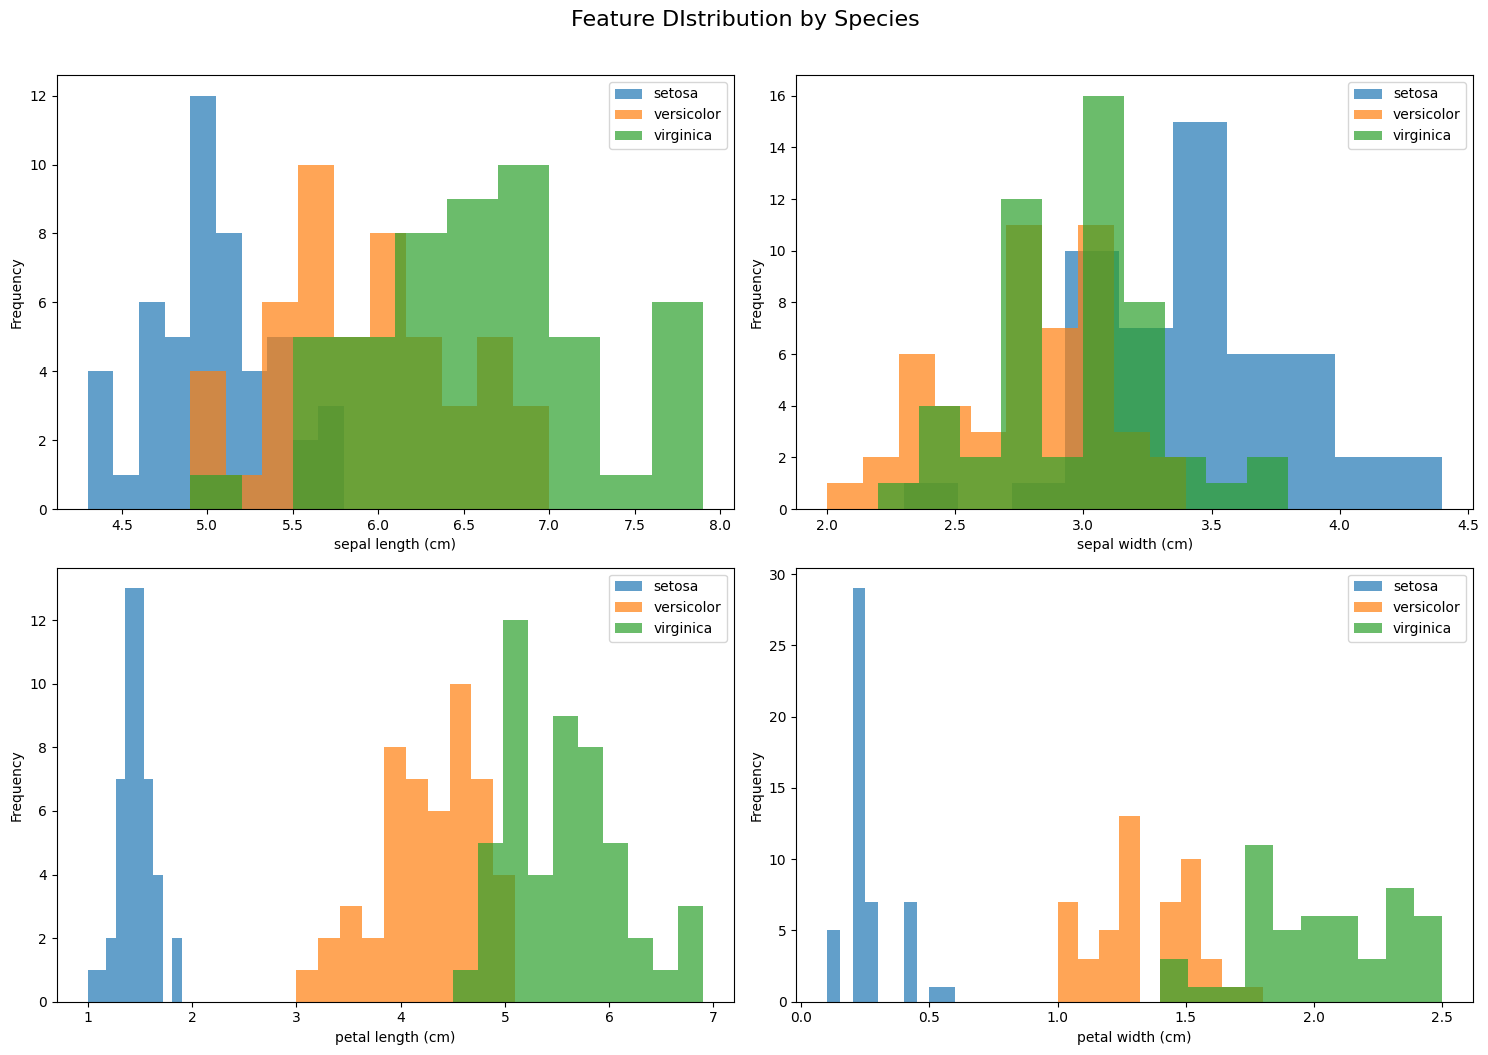

In [15]:
# Create a figure with multiple subplots
plt.figure(figsize=(15,10))

# Histogram for each feature
for i, feature in enumerate(iris.feature_names):
  plt.subplot(2, 2, i+1)
  for species in iris.target_names:
    plt.hist(df[df['species']== species][feature], alpha =0.7, label = species)
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.legend()

plt.tight_layout()
plt.suptitle('Feature DIstribution by Species', fontsize = 16, y= 1.05)
plt.show()





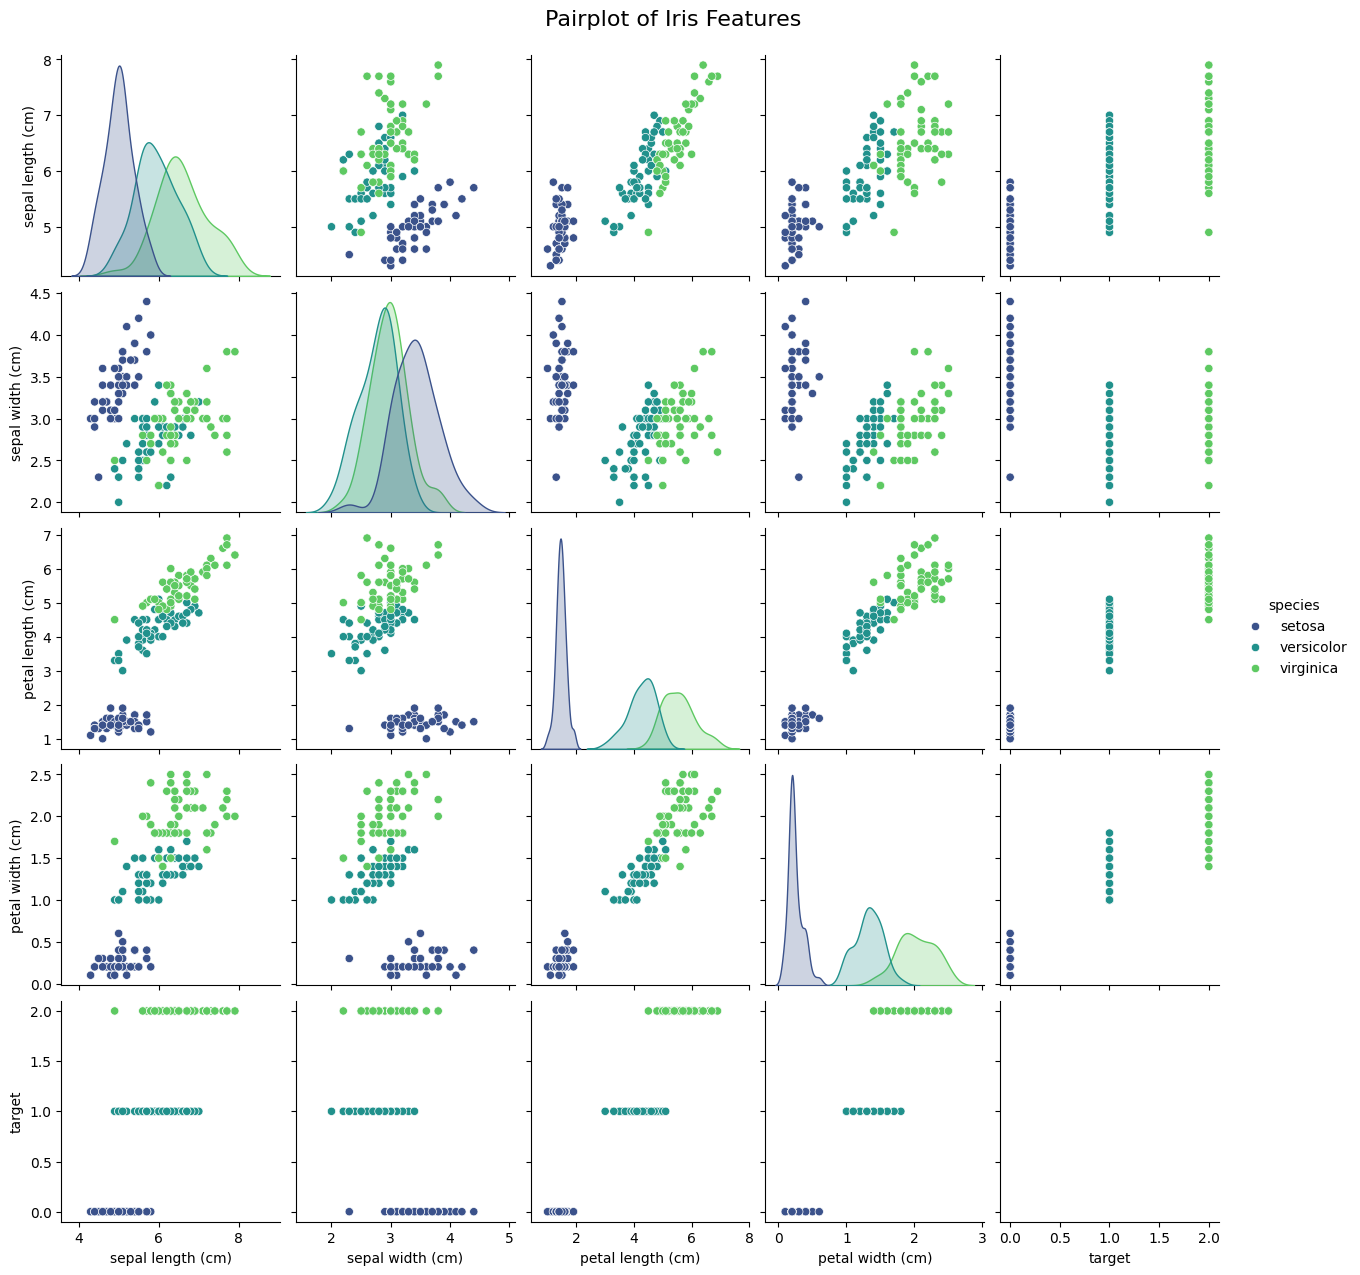

In [16]:
# Pairplot to visualize relationship between features
sns.pairplot(df, hue='species', palette='viridis', height = 2.5)
plt.suptitle('Pairplot of Iris Features', fontsize = 16, y= 1.02)
plt.show()

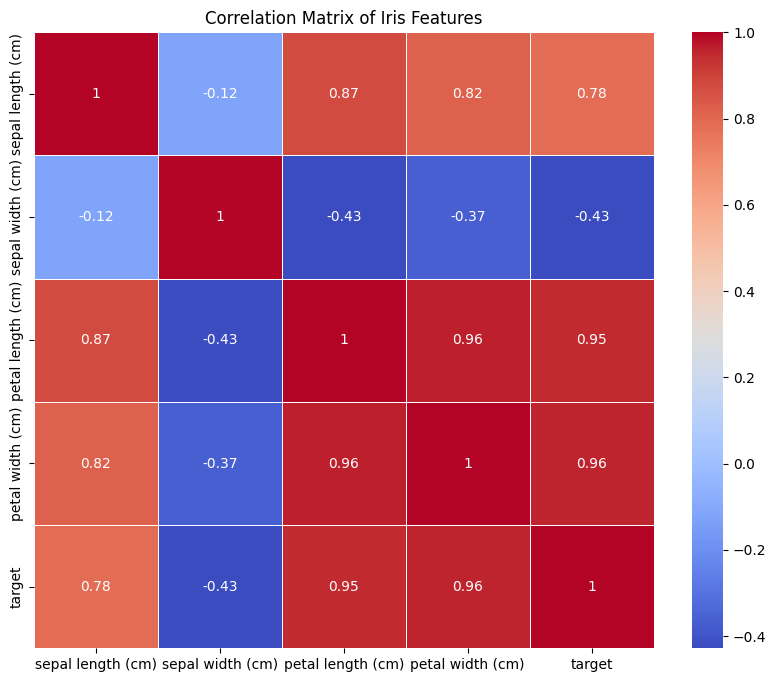

In [17]:
# Correlation matrix
plt.figure(figsize=(10,8))
correlation = df.drop('species', axis=1).corr()
sns.heatmap(correlation, annot= True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Iris Features")
plt.show()

**Exploratory Data Analysis with plotly**

In [18]:
# Histogram with each feature
for feature in iris.feature_names:
  fig = px.histogram(df, x=feature, color = 'species', marginal = 'box',
                     title=f'Distribution of {feature} by Species',
                     color_discrete_sequence= px.colors.qualitative.Set1)
  fig.show()

In [19]:
# Create a scatter matrix with plotly
fig = px.scatter_matrix(df, dimensions=iris.feature_names, color='species',
                        title='Scatter Matrix of Iris Features',
                        color_discrete_sequence= px.colors.qualitative.Set1)
fig.update_layout(width= 900, height= 900)
fig.show()

In [21]:
fig = px.scatter_3d(df, x='sepal length (cm)',
                    y='sepal width (cm)',
                    z='petal length (cm)',
                   color='species',
                    symbol='species', size_max=10,
                   title='3D Scatter Plot of Iris Features')
fig.show()

**Data Preprocessing**

In [23]:
# Split the data into features (X) and target (y)
X = df.drop(['species', 'target'], axis=1).values  # Convert to numpy array for scikit-learn
y = df['target'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData splitting:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Data splitting:
Training set size: 120 samples
Testing set size: 30 samples


In [24]:
# Feature scaling - standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#show the effect of scaling on the first sample
print("\nEffect of scaling on the first training sample:")
print("Before scaling:", X_train[0])
print("After scaling:", X_train_scaled[0])


Effect of scaling on the first training sample:
Before scaling: [4.4 2.9 1.4 0.2]
After scaling: [-1.72156775 -0.33210111 -1.34572231 -1.32327558]


### **Logistic Regression with Stochastic Grdient Descent**

In [26]:
#SGD is the optimization that minimizes the loss function by taking steps
#proportional to the negative of the gradient of the loss function
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss= 'log_loss', # log loss for logistic regression
                        max_iter = 1000, # Max number of itertions
                        tol = 1e-3, # tolerance for stopping criterion
                        random_state= 42, # for reporducability
                        learning_rate = 'optimal', # let SGD choose optimal rate
                        eta0=0.01 # initial learning rate
                        )

# Train the model
sgd_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_sgd = sgd_clf.predict(X_test_scaled)



In [27]:
# Evaluate the model
print("\nLogistic Regression with SGD:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sgd, target_names=iris.target_names))



Logistic Regression with SGD:
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



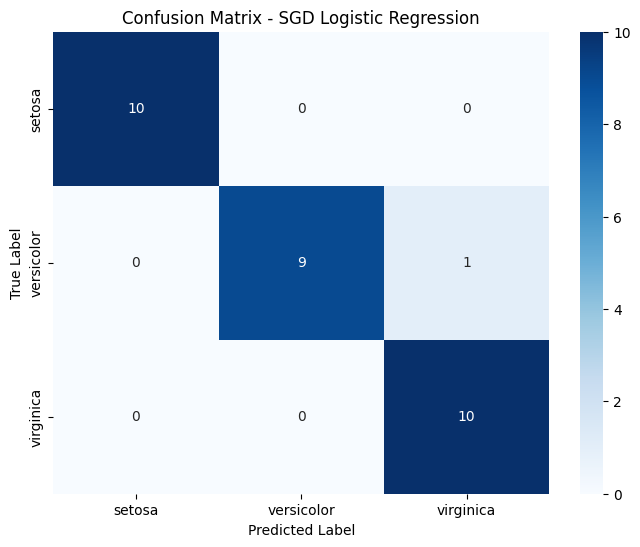

In [28]:
# Confusion Matrix with matplotlib
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred_sgd)

sns.heatmap(cm, annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - SGD Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
# Confusion Matrix with plotly
fig = px.imshow(cm,
                labels=dict(x="Predicted Label", y="True Label", color="Count"),
                x=iris.target_names, y=iris.target_names,
                text_auto=True, color_continuous_scale='Blues',
                title='Confusion Matrix - SGD Logistic Regression')
fig.show()

In [32]:
# Cross-validation to get a more robust measure of model performance
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")


Cross-validation scores: [0.91666667 0.95833333 0.83333333 0.91666667 0.95833333]
Mean cross-validation score: 0.9167
Standard deviation: 0.0456


<Figure size 1000x800 with 0 Axes>

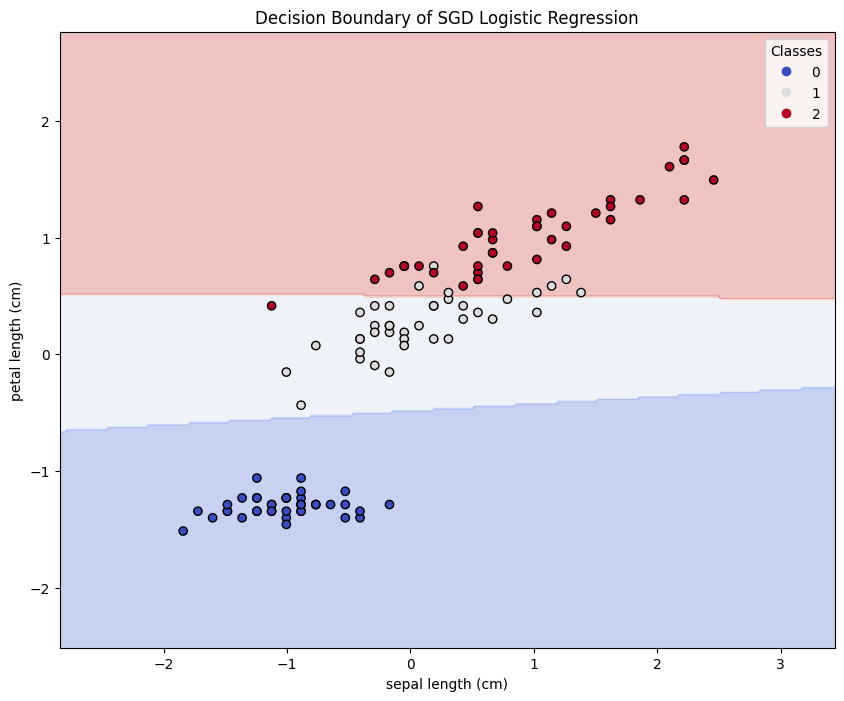

In [33]:
# For visualization purposes, we'll use only 2 features
# We'll use sepal length and petal length which are typically more separable
X_2d = X[:, [0, 2]]  # sepal length and petal length
y_2d = y

# Split and scale the 2D data
X_2d_train, X_2d_test, y_2d_train, y_2d_test = train_test_split(
    X_2d, y_2d, test_size=0.2, random_state=42, stratify=y_2d
)
scaler_2d = StandardScaler()
X_2d_train_scaled = scaler_2d.fit_transform(X_2d_train)
X_2d_test_scaled = scaler_2d.transform(X_2d_test)

# Train the SGD model on the 2D data
sgd_clf_2d = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
sgd_clf_2d.fit(X_2d_train_scaled, y_2d_train)

# Create a mesh grid for the decision boundary
def plot_decision_boundary(clf, X, y, feature_names, class_names, ax=None):
    # Create a mesh grid
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    # Make predictions on the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # If no axes provided, create a new figure
    if ax is None:
        plt.figure(figsize=(10, 8))
        ax = plt.gca()

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Plot the data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

    # Add legend and labels
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.legend(*scatter.legend_elements(), title="Classes", loc="upper right")

    return ax

plt.figure(figsize=(10, 8))
feature_names_2d = [iris.feature_names[0], iris.feature_names[2]]  # sepal length and petal length
plot_decision_boundary(sgd_clf_2d, X_2d_train_scaled, y_2d_train, feature_names_2d, iris.target_names)
plt.title('Decision Boundary of SGD Logistic Regression')
plt.show()

In [34]:
# Create a mesh grid for the decision boundary using plotly
def create_decision_boundary_plot(clf, X, y, feature_names, class_names):
    # Create a mesh grid
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    # Make predictions on the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the plotly figure
    fig = go.Figure()

    # Add contour for the decision boundary
    fig.add_trace(go.Contour(
        z=Z,
        x=np.arange(x_min, x_max, h),
        y=np.arange(y_min, y_max, h),
        colorscale='RdBu',
        showscale=False,
        opacity=0.4
    ))

    # Add scatter plot for data points
    for i, class_name in enumerate(class_names):
        idx = np.where(y == i)
        fig.add_trace(go.Scatter(
            x=X[idx, 0].flatten(),
            y=X[idx, 1].flatten(),
            mode='markers',
            name=class_name,
            marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey'))
        ))

    # Update layout
    fig.update_layout(
        title='Decision Boundary of SGD Logistic Regression',
        xaxis_title=feature_names[0],
        yaxis_title=feature_names[1],
        width=800,
        height=600
    )

    return fig

plotly_fig = create_decision_boundary_plot(sgd_clf_2d, X_2d_train_scaled, y_2d_train,
                                          feature_names_2d, iris.target_names)
plotly_fig.show()

### **Comparing different solvers for Logistic Regression**

In [37]:
# Define different solvers to try
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solver_results = {}

# Train and evaluate models with different solvers
for solver in solvers:
    print(f"\nTraining Logistic Regression with solver: {solver}")

    # Some solvers don't work well without regularization tuning
    if solver in ['newton-cg', 'sag', 'lbfgs']:
        C = 10.0  # Lower regularization
    else:
        C = 1.0   # Default regularization

    # Create and train the model
    lr = LogisticRegression(solver=solver,
                            C=C, max_iter=1000,
                            random_state=42,
                            )

    lr.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = lr.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    solver_results[solver] = accuracy

    print(f"Accuracy with {solver}: {accuracy:.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))


Training Logistic Regression with solver: newton-cg
Accuracy with newton-cg: 1.0000
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Training Logistic Regression with solver: lbfgs
Accuracy with lbfgs: 1.0000
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Training Logistic Regression 

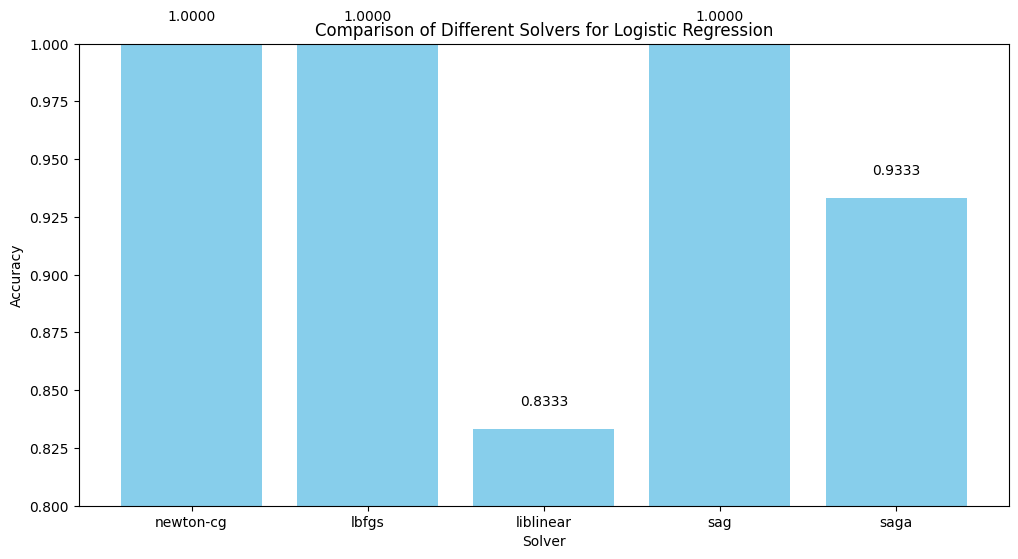

In [38]:
# Visualize solver comparisons with matplotlib
plt.figure(figsize=(12, 6))
plt.bar(solver_results.keys(), solver_results.values(), color='skyblue')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Solvers for Logistic Regression')
plt.ylim(0.8, 1.0)  # Adjust y-axis to better see differences
for i, (solver, accuracy) in enumerate(solver_results.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center')
plt.show()

In [39]:
# Visualize solver comparisons with plotly
fig = px.bar(x=list(solver_results.keys()), y=list(solver_results.values()),
            labels={'x': 'Solver', 'y': 'Accuracy'},
            title='Comparison of Different Solvers for Logistic Regression',
            color=list(solver_results.keys()),
            text=[f'{acc:.4f}' for acc in solver_results.values()])

fig.update_layout(
    xaxis_title='Solver',
    yaxis_title='Accuracy',
    yaxis_range=[0.8, 1.0]
)
fig.show()

### **Visualize the model coefficients**

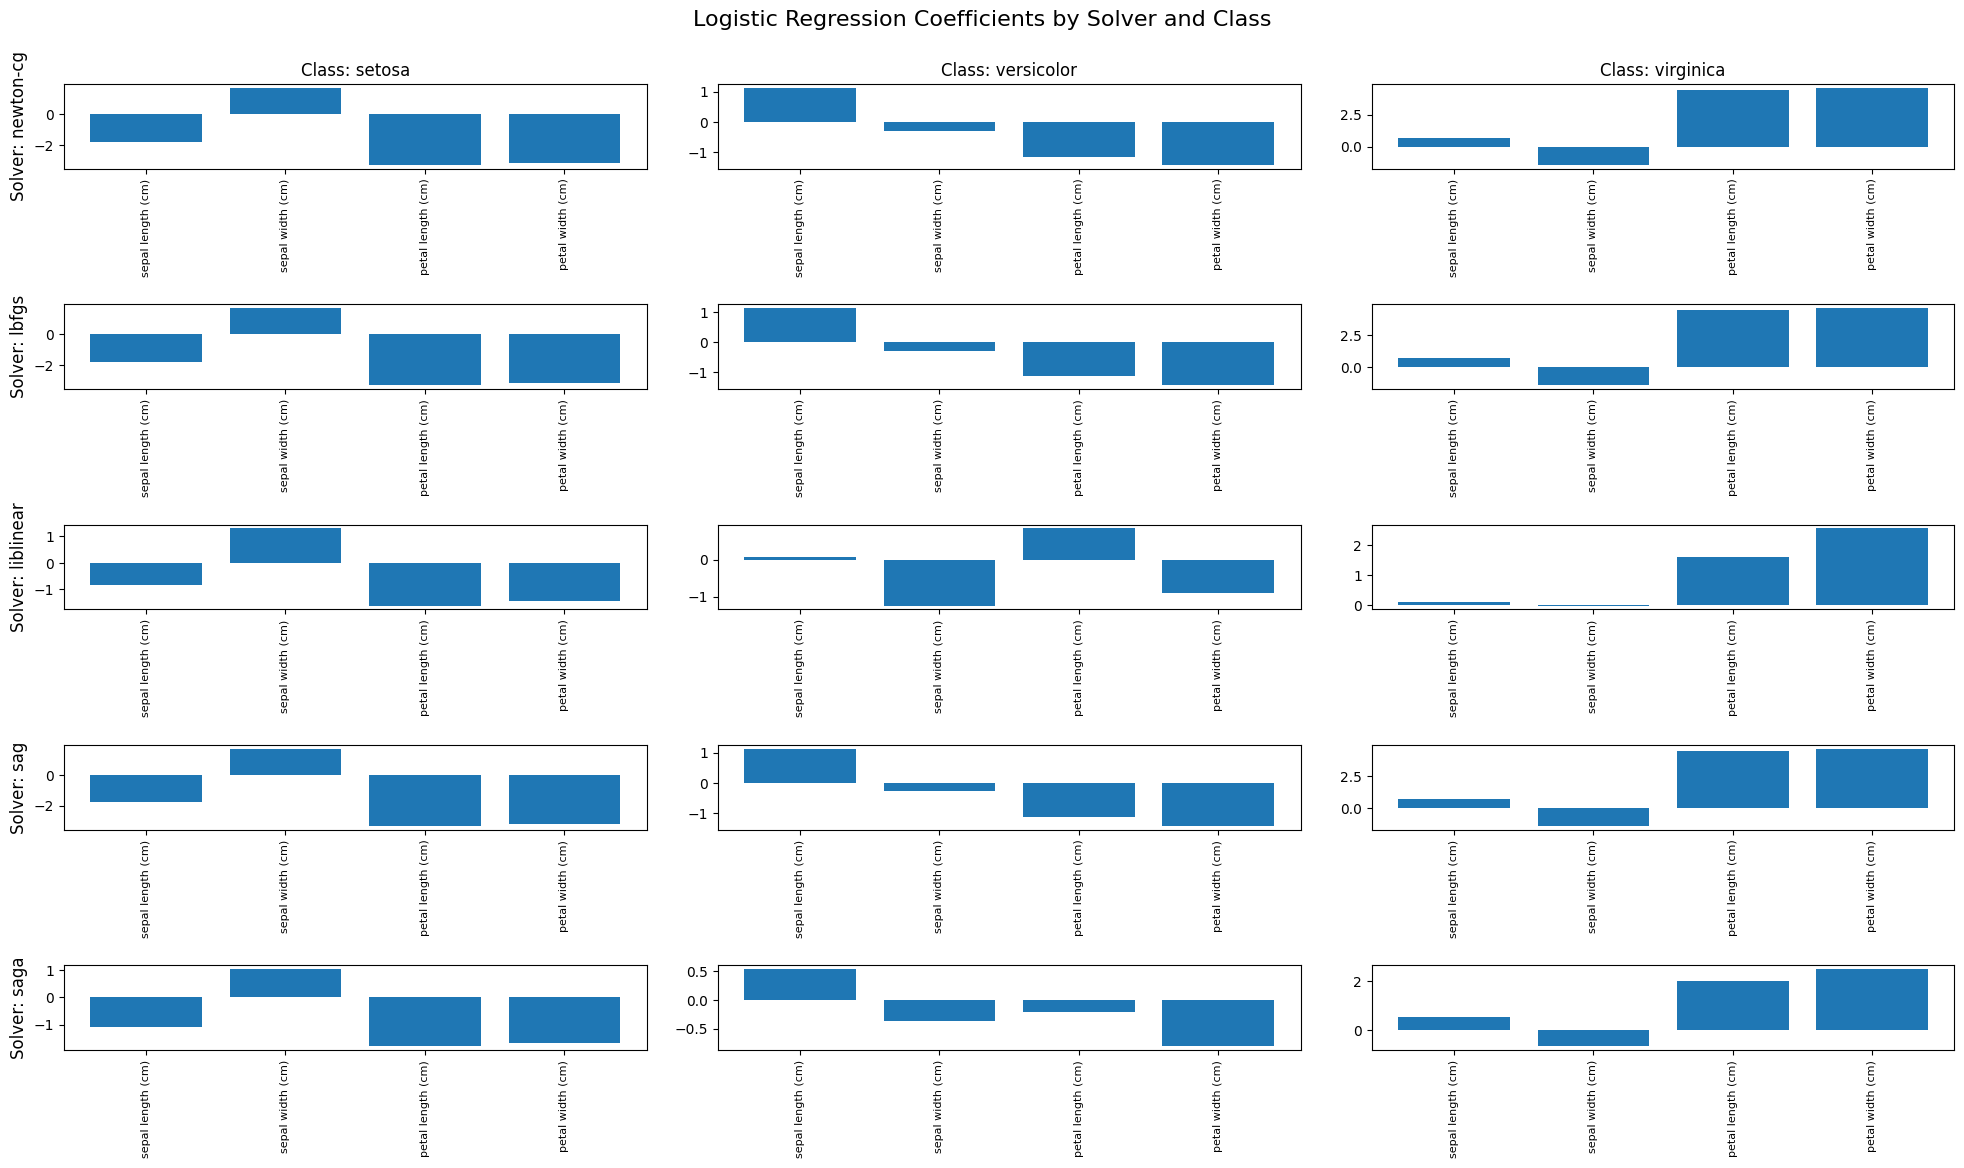

In [43]:
# Compare coefficients for different solvers
plt.figure(figsize=(20, 12))  # Increased figure size

for i, solver in enumerate(solvers):
    if solver in ['newton-cg', 'sag', 'lbfgs']:
        C = 10.0
    else:
        C = 1.0

    lr = LogisticRegression(solver=solver, C=C, max_iter=1000, random_state=42)
    lr.fit(X_train_scaled, y_train)

    # For each class
    for j in range(len(iris.target_names)):
        plt.subplot(len(solvers), len(iris.target_names), i*len(iris.target_names) + j + 1)

        # One-vs-Rest approach coefficients
        coefs = lr.coef_[j]
        plt.bar(iris.feature_names, coefs)
        plt.xticks(rotation=90, fontsize=8)  # Smaller font size

        if i == 0:
            plt.title(f'Class: {iris.target_names[j]}', fontsize=12)
        if j == 0:
            plt.ylabel(f'Solver: {solver}', fontsize=12)

# Add more space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Increase white space
plt.tight_layout(pad=2.0, rect=[0, 0, 1, 0.96])  # Add padding, leave room for suptitle
plt.suptitle('Logistic Regression Coefficients by Solver and Class', y=0.98, fontsize=16)
plt.show()

In [41]:
# Visualize coefficients with plotly
for solver in solvers:
    if solver in ['newton-cg', 'sag', 'lbfgs']:
        C = 10.0
    else:
        C = 1.0

    lr = LogisticRegression(solver=solver, C=C, max_iter=1000, random_state=42)
    lr.fit(X_train_scaled, y_train)

    fig = make_subplots(rows=1, cols=3, subplot_titles=[f'Class: {name}' for name in iris.target_names])

    for j in range(len(iris.target_names)):
        coefs = lr.coef_[j]

        fig.add_trace(
            go.Bar(x=iris.feature_names, y=coefs, name=iris.target_names[j]),
            row=1, col=j+1
        )

    fig.update_layout(
        height=400, width=1000,
        title_text=f'Logistic Regression Coefficients - Solver: {solver}'
    )
    fig.show()

### **Summary**

In [42]:
print("\n--- SUMMARY ---")
print("We've successfully trained logistic regression models on the Iris dataset using:")
print("1. Stochastic Gradient Descent (SGD)")
print(f"   - Accuracy: {accuracy_score(y_test, y_pred_sgd):.4f}")
print("2. Various solvers for logistic regression:")
for solver, accuracy in solver_results.items():
    print(f"   - {solver}: {accuracy:.4f}")

print("\nBest performing solver:", max(solver_results, key=solver_results.get))
print(f"Best accuracy: {max(solver_results.values()):.4f}")

print("\nKey insights:")
print("- The Iris dataset is relatively simple and all models perform well")
print("- The liblinear and saga solvers are generally good choices for small datasets like Iris")
print("- Feature scaling is important, especially for gradient-based methods")
print("- Sepal length and petal length are good features for separating the classes")

print("\nNext steps:")
print("1. Try other classifiers (SVM, Random Forest, etc.)")
print("2. Perform hyperparameter tuning")
print("3. Apply dimensionality reduction techniques")
print("4. Test on more complex datasets")


--- SUMMARY ---
We've successfully trained logistic regression models on the Iris dataset using:
1. Stochastic Gradient Descent (SGD)
   - Accuracy: 0.9667
2. Various solvers for logistic regression:
   - newton-cg: 1.0000
   - lbfgs: 1.0000
   - liblinear: 0.8333
   - sag: 1.0000
   - saga: 0.9333

Best performing solver: newton-cg
Best accuracy: 1.0000

Key insights:
- The Iris dataset is relatively simple and all models perform well
- The liblinear and saga solvers are generally good choices for small datasets like Iris
- Feature scaling is important, especially for gradient-based methods
- Sepal length and petal length are good features for separating the classes

Next steps:
1. Try other classifiers (SVM, Random Forest, etc.)
2. Perform hyperparameter tuning
3. Apply dimensionality reduction techniques
4. Test on more complex datasets


In [44]:
!sudo apt-get update
!sudo apt-get install texlive-xetex pandoc

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,781 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-upda

In [47]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab_Notebooks/Machine_Learning/2.Logistic_Regression_Scikit-Learn.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Machine_Learning/2.Logistic_Regression_Scikit-Learn.ipynb to pdf
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  ((*- endblock -*))
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  ((*- endblock -*))
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  ((*- endblock -*))
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  ((*- endblock -*))
[NbConvertApp] Support files will be in 2.Logistic_Regression_Scikit-Learn_files/